<a href="https://colab.research.google.com/github/JacksonTMaeda/Mec-Estatistica.Caminho-Aletorio/blob/main/CaminhoAleat%C3%B3rio1D(Mec%C3%A2nica_estat%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forneça a quantidade total de passos: 1000
Forneça a probabilidade do passo ser para direita: 0.4
Forneça o tamanho dos passos: 1
+------------+------+------+--------------------------+-------------------------+-------------------------+
| Valor de m |  N1  |  N2  | Quantide de microestados |         P_N(N1)         |         P_N(N2)         |
+------------+------+------+--------------------------+-------------------------+-------------------------+
|   -1000    |  0   | 1000 |           1.0            | 1.4166102623834337e-222 |           0.0           |
|    -998    |  1   | 999  |          1000.0          |  9.444068415889559e-220 |           0.0           |
|    -996    |  2   | 998  |         499500.0         |  3.144874782491224e-217 |           0.0           |
|    -994    |  3   | 997  |       166167000.0        |  6.974633406502758e-215 |           0.0           |
|    -992    |  4   | 996  |      41417124750.0       | 1.1589515843805418e-212 |           0.0           |
|    -

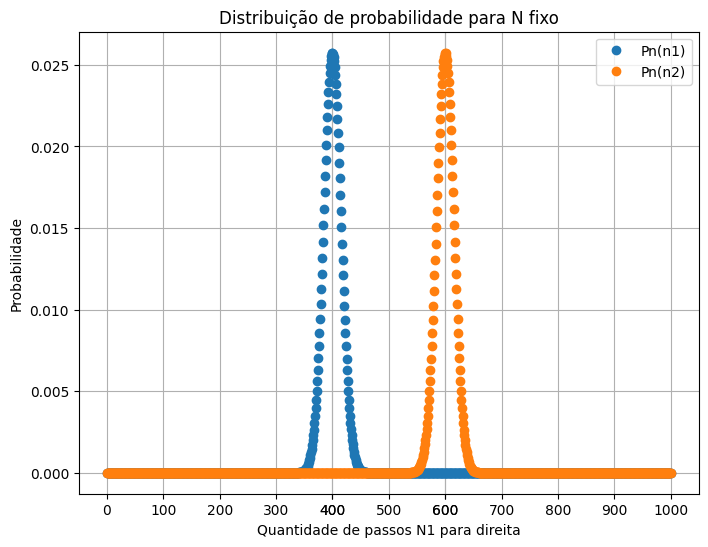

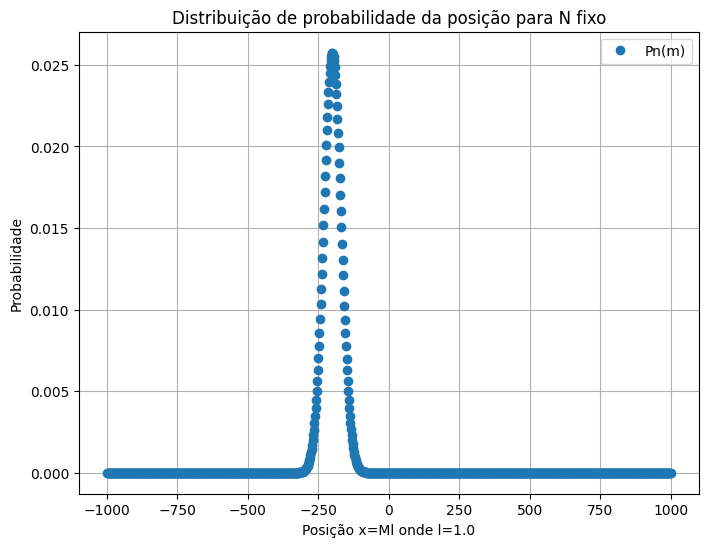

In [44]:
from matplotlib import markers
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np


#funçoes
def Cn(x):
  return np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))

def Pn(n1):
  return (p**n1)*(q**(n-n1))*Cn(n1)

def Pnm(m):
  return (p**((n+m)/2))*(q**((n-m)/2))*(np.math.factorial(n)/(np.math.factorial((n+m)//2)*np.math.factorial((n-m)//2)))


#listas
m_possiveis=[]
n2_possiveis=[]
n1_possiveis=[]
valores_de_Pn1=[]
valores_de_Pn2=[]
valores_de_Pnm=[]
valores_da_Pnmx=[]
quantide_de_sequencia=[]
x_sticksmaxn1=[]
x_sticksmaxn2=[]


#Entradas
n=int(input('Forneça a quantidade total de passos: '))
p=float(input('Forneça a probabilidade do passo ser para direita: '))
l=float(input('Forneça o tamanho dos passos: '))

#passos para a esquerda(prooblema 1 dimensão)
q=1-p


#Organizando os dados, obtidos apartir das entradas, em listas específicas:
for n1 in range(0,n+1):
  m=n1-(n-n1)
  n1_possiveis.append(n1)
  m_possiveis.append(2*n1-n)
  n2_possiveis.append(n-n1)
  valores_de_Pn1.append(Pn(n1))
  valores_de_Pn2.append(Pn(n-n1))
  valores_de_Pnm.append(Pnm(m))
  valores_da_Pnmx.append(Pnm(m)*l)
  quantide_de_sequencia.append(Cn(n1))



#Criando a tabela para expor os dados de forma mais amigável:
tabela=PrettyTable()
tabela.field_names=['Valor de m', 'N1', 'N2','Quantide de microestados','P_N(N1)','P_N(N2)']
for i in range(0,len(m_possiveis)):
  tabela.add_row([m_possiveis[i], n1_possiveis[i], n2_possiveis[i], quantide_de_sequencia[i], valores_de_Pn1[i],valores_de_Pn2[i]])
print(tabela)


#criando o gráfico da distribuição de probabilidade para n1 e n2:

plt.figure(figsize=(8,6))
plt.plot(n1_possiveis,valores_de_Pn1,marker='o', linestyle='None', label='Pn(n1)')
plt.plot(n1_possiveis,valores_de_Pn2,marker='o', linestyle='None', label='Pn(n2)' )
plt.title(f'Distribuição de probabilidade para N fixo')
plt.ylabel('Probabilidade')
plt.xlabel('Quantidade de passos N1 para direita')
plt.grid(True)
plt.legend()
quant=len(n1_possiveis)
if n>=100 and n<1000:
  x_sticks=np.linspace(0,n1_possiveis[-1],int(quant/10)+1, endpoint=True, dtype=int)
  x_sticks=np.append(x_sticks, p*n)
  x_sticks=np.append(x_sticks,q*n)
  plt.xticks(x_sticks)
  plt.show()
elif n>=1000:
  x_sticks=np.linspace(0,n1_possiveis[-1],int(quant/100)+1, endpoint=True, dtype=int)
  x_sticks=np.append(x_sticks, p*n)
  x_sticks=np.append(x_sticks,q*n)
  plt.xticks(x_sticks)
  plt.show()
else:
  plt.show()


#criando o gráfico da distribuição de probabilidade para m:
plt.figure(figsize=(8,6))
plt.plot(np.array(m_possiveis)*l,valores_da_Pnmx,marker='o',linestyle='None', label='Pn(m)')
plt.title(f'Distribuição de probabilidade da posição para N fixo')
plt.ylabel('Probabilidade')
plt.xlabel(f'Posição x=Ml onde l={l}')
plt.grid(True)
plt.legend()
plt.show()

